# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import cv2

# Loading the Data

In [23]:
#NumPy array of A-Z characters with different fonts
array = np.load('character_font.npz')
print(array)

In [24]:
array.files

['images', 'labels']

In [13]:
array['images'].shape

(389765, 32, 32)

Contains 389765 GreyScale images with dimension 32x32 pixels

In [35]:
np.unique(array['labels'],return_counts =True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=uint8),
 array([14991, 14991, 14991, 14991, 14991, 14991, 14991, 14991, 14991,
        14991, 14991, 14991, 14991, 14991, 14991, 14990, 14991, 14991,
        14991, 14991, 14991, 14991, 14991, 14991, 14991, 14991],
       dtype=int64))

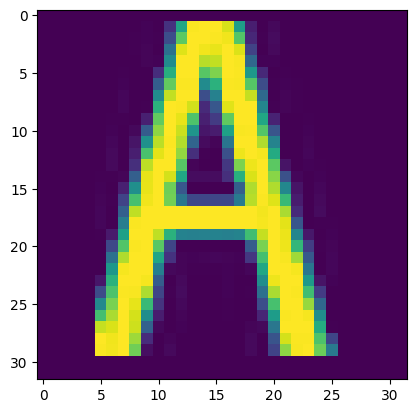

In [36]:
plt.imshow(array['images'][0])

In [39]:
array['images']

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [40]:
X = array['images']
Y = array['labels']
X.shape, Y.shape

((389765, 32, 32), (389765,))

In [57]:
#Dictionary to access alphabet with the index
dic_alphabet = {}
for i in range(65, 91, 1):
    dic_alphabet[i-65] = chr(i)
print(dic_alphabet)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


# Dividing Data into training and test data

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 4)

In [46]:
X_train.shape, Y_train.shape

((350788, 32, 32), (350788,))

In [47]:
X_test.shape, Y_test.shape

((38977, 32, 32), (38977,))

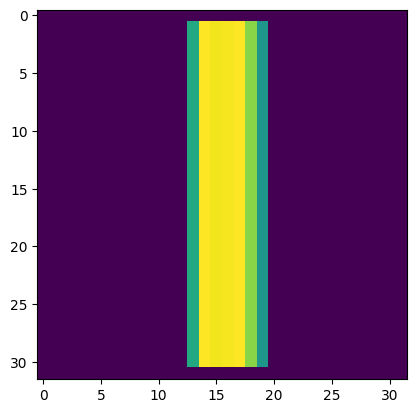

I


In [102]:
#Printing the Image and Corresponding Label
plt.imshow(X_train[70])
plt.show()

print(dic_alphabet[Y_train[70]])

In [59]:
#Scaling The values
X_train_scaled = X_train/255 
X_test_scaled = X_test/255

# Building Neural Network

In [103]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32)),
        keras.layers.Dense(150, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(26, activation='softmax'),
])

In [104]:
# Compiling the Neural network
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [105]:
#Training Our Neural Network
model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10
10963/10963 [==============================] - 77s 6ms/step - loss: 0.9056 - accuracy: 0.7592
Epoch 2/10
10963/10963 [==============================] - 57s 5ms/step - loss: 0.7049 - accuracy: 0.8076
Epoch 3/10
10963/10963 [==============================] - 56s 5ms/step - loss: 0.6498 - accuracy: 0.8213
Epoch 4/10
10963/10963 [==============================] - 67s 6ms/step - loss: 0.6161 - accuracy: 0.8292
Epoch 5/10
10963/10963 [==============================] - 69s 6ms/step - loss: 0.5929 - accuracy: 0.8346
Epoch 6/10
10963/10963 [==============================] - 58s 5ms/step - loss: 0.5753 - accuracy: 0.8392
Epoch 7/10
10963/10963 [==============================] - 61s 6ms/step - loss: 0.5598 - accuracy: 0.8425
Epoch 8/10
10963/10963 [==============================] - 64s 6ms/step - loss: 0.5478 - accuracy: 0.8458
Epoch 9/10
10963/10963 [==============================] - 68s 6ms/step - loss: 0.5369 - accuracy: 0.8486
Epoch 10/10
10963/10963 [==============================

# Train Accuracy - 84.98%

In [69]:
#Evaluating our model
model.evaluate(X_test_scaled, Y_test)

1219/1219 [==============================] - 11s 6ms/step - loss: 0.6594 - accuracy: 0.8219


[0.6593993306159973, 0.8218693137168884]

# Test Accuracy - 82.19%

In [71]:
#Making Predictions
Y_pred = model.predict(X_test_scaled)

Y_pred.shape

1219/1219 [==============================] - 8s 2ms/step


(38977, 26)

In [72]:
print(Y_pred[10])

[7.3374267e-12 5.8102864e-07 5.9646578e-04 2.3178967e-11 9.9993068e-01
 3.7551498e-01 1.6141733e-07 4.5397588e-09 1.9713913e-07 1.9824498e-12
 4.5546678e-09 1.4413824e-07 3.1846679e-15 7.2852775e-14 4.6134263e-11
 1.0964266e-07 1.7308328e-12 3.3202625e-09 1.7454469e-06 5.9515536e-05
 1.9860292e-13 7.2210453e-14 3.4753961e-15 1.9244687e-11 2.0040049e-13
 2.8626297e-07]


In [77]:
# converting the prediction probabilities to class label
print(dic_alphabet[Y_test[10]])

label_pred = np.argmax(Y_pred[10])
print(dic_alphabet[label_pred])

E
E


# Y_test -> True Labels
# Y_pred_labels -> Predicted Labesl

In [81]:
#Consion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[1217   12    6   18    7    8    6   16   19    7    7    5    6   24
    14    2   26   21    1    2   22    0    6   13    3    4]
 [  18 1275    5   35   27   14   21    8   20    2    2    5    3    7
    16    6    7   15   13    6   25    3    7    3    5   11]
 [   7    6 1298    0   48    9   38    3   16    0    6   17    0    3
    21    8    6    3    7    9   20    2    2    3    4    3]
 [  14   47    6 1194    4   12    1    8   20   12    1    0    4   22
    54   16   25    5    5    4   40    8   11    1   11    4]
 [   5   22   36    4 1201   32   19    7   21    3    3    6    0    3
    11    3   10    4    9   11   17    2    2    4    0   13]
 [   8   13    2    3   19 1283    4    7   16   10    0    0    2    8
     7   23    8    7    9   11   21    7    4    4    4    6]
 [  12   25   46    4   29   11 1211    7   22    4    5    1    3    4
    25    1   53    3   18    5   36    1    6    1    3    4]
 [  27   17    0    9    1    9    2 1225   

Text(0.5, 47.7222222222222, 'Predicted Labels')

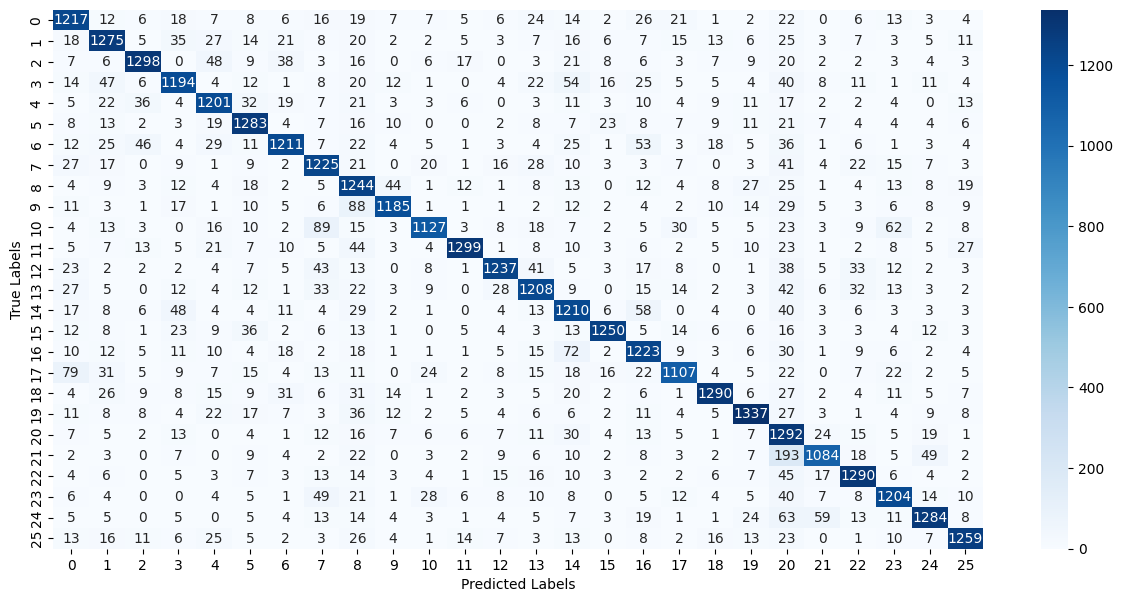

In [86]:
#HeatMap
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

# Downloading the Model

In [88]:
import pickle
with open('A-Z Model.pkl','wb') as f:
    pickle.dump(model, f)

# Building Predictive System

In [89]:
def prediction(img):
    arr_img = cv2.imread(img)               #Converts Image into numpy array
    grayscale_img = cv2.cvtColor(arr_img, cv2.COLOR_RGB2GRAY)
    resized_img = cv2.resize(grayscale_img, (32,32))
    resized_img_scaled = resized_img/255
    reshaped_img = np.reshape(resized_img_scaled, [1,32,32])     #To tell compiler only one image is to be predicted
    prediction = model.predict(reshaped_img)
    pred_label = np.argmax(prediction)
    print('The Predicted Image is', chr(pred_label+65))